## County Health Rankings
Data drawn from census.gov

### Outline
    A. Set up
       1. Import dependencies and data files
       2. Read data files into data frames
    B. Calculate employment growth rate
       3. Merge 2020 and 2015 employment numbers into the main data frame and delete extra columns
       4. Compute Employment growth rate
       5. Check growth rates for reasonability
       6. Plot rates to see if they look like a normal distribution
    C. Clean/Preprocess Data for Regression Analysis
       7. Check for null values, clean where appropriate
       8. Check data types, convert to numeric where needed
       9. Check for outlier data
    D. Perform Multiple Linear Regression and Examine Results
      10. Reshape data into an array (num_samples, num_features)
      11. Define X (independent variables) and y (dependent variable)
      12. Create and fit the model
      13. Print intercept, slope, r and r^2 for each factor
    E. Analysis of Regression
      14. Examine outputs and determine which factors are most predictive
    F. Other Methods - Polynomial regression, random forest ensemble model?
   

## Set Up

In [153]:
# 1. Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#set print to 20 (for rerunning so it's not set at none)
pd.set_option('display.max_rows', 20)

In [154]:
#2. Import data files
#Set path of input file
main_data = "Resources/combined_ratings.csv"
data_2020 = "Resources/DP03_counties_2020.csv"
data_2015 = "Resources/DP03_counties_2015.csv"

In [155]:
#Read combined ratings data file into a DataFrame
combined_ratings_df = pd.read_csv(main_data)
combined_ratings_df

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,16.9,26.5,0.7,1.5,0.1,4.4,65.4,1,51.6,41.0
1,1001,Alabama,Autauga,791.0,8129.0,21,4.7,4.7,9.0,18,...,15.6,19.3,0.5,1.2,0.1,3.0,74.3,1,51.4,42.0
2,1003,Alabama,Baldwin,2967.0,7354.0,18,4.2,4.3,8.0,17,...,20.4,8.8,0.8,1.2,0.1,4.6,83.1,1,51.5,42.3
3,1005,Alabama,Barbour,472.0,10254.0,30,5.4,5.2,11.0,22,...,19.4,48.0,0.7,0.5,0.2,4.3,45.6,2,47.2,67.8
4,1007,Alabama,Bibb,471.0,11978.0,19,4.6,4.6,10.0,19,...,16.5,21.1,0.4,0.2,0.1,2.6,74.6,0,46.8,68.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,532.0,7832.0,15,3.4,3.6,10.0,18,...,12.1,1.1,1.5,1.0,0.2,16.1,79.3,2,48.5,10.9
3189,56039,Wyoming,Teton,109.0,2731.0,12,3.0,3.2,8.0,15,...,15.4,0.6,0.9,1.4,0.2,14.9,81.5,4,48.4,46.4
3190,56041,Wyoming,Uinta,256.0,7331.0,16,3.6,3.7,10.0,17,...,14.1,0.7,1.4,0.5,0.1,9.2,87.4,1,49.3,43.1
3191,56043,Wyoming,Washakie,110.0,6586.0,16,3.6,3.7,7.0,17,...,21.7,0.5,1.8,0.8,0.1,14.1,82.4,0,49.4,36.0


In [156]:
#Read 2020 DP03 data file into a DataFrame
data_2020_df = pd.read_csv(data_2020)
data_2020_df

,NAME,GEO_ID,FIPS,Employed 2020
0,"Autauga County, Alabama",0500000US01001,1001,24580
1,"Baldwin County, Alabama",0500000US01003,1003,98768
2,"Barbour County, Alabama",0500000US01005,1005,8707
3,"Bibb County, Alabama",0500000US01007,1007,8303
4,"Blount County, Alabama",0500000US01009,1009,22836
...,...,...,...,...
3216,"Renville County, Minnesota",0500000US27129,27129,6997
3217,"Roseau County, Minnesota",0500000US27135,27135,8019
3218,"Sherburne County, Minnesota",0500000US27141,27141,52213
3219,"Steele County, Minnesota",0500000US27147,27147,18725


In [157]:
#Read 2015 DP03 data file into a DataFrame
data_2015_df = pd.read_csv(data_2015)
data_2015_df

,NAME,GEO_ID,FIPS,Employed 2015
0,"Childress County, Texas",0500000US48075,48075,2600
1,"Comal County, Texas",0500000US48091,48091,54190
2,"Houston County, Texas",0500000US48225,48225,7694
3,"Navarro County, Texas",0500000US48349,48349,20159
4,"Scurry County, Texas",0500000US48415,48415,7371
...,...,...,...,...
3215,"Charlotte County, Virginia",0500000US51037,51037,5266
3216,"Burleson County, Texas",0500000US48051,48051,7352
3217,"Greensville County, Virginia",0500000US51081,51081,3365
3218,"Thurston County, Washington",0500000US53067,53067,119123


## Calculate Employment Growth Rate

In [158]:
# 3a. Merge 2015 employment count into combined ratings dataframe
combined_ratings_df = combined_ratings_df.merge(data_2015_df,on=["FIPS","FIPS"],how = 'left')
combined_ratings_df

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,NAME,GEO_ID,Employed 2015
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,1.5,0.1,4.4,65.4,1,51.6,41.0,NaN,NaN,NaN
1,1001,Alabama,Autauga,791.0,8129.0,21,4.7,4.7,9.0,18,...,1.2,0.1,3.0,74.3,1,51.4,42.0,"Autauga County, Alabama",0500000US01001,23986.0
2,1003,Alabama,Baldwin,2967.0,7354.0,18,4.2,4.3,8.0,17,...,1.2,0.1,4.6,83.1,1,51.5,42.3,"Baldwin County, Alabama",0500000US01003,85953.0
3,1005,Alabama,Barbour,472.0,10254.0,30,5.4,5.2,11.0,22,...,0.5,0.2,4.3,45.6,2,47.2,67.8,"Barbour County, Alabama",0500000US01005,8597.0
4,1007,Alabama,Bibb,471.0,11978.0,19,4.6,4.6,10.0,19,...,0.2,0.1,2.6,74.6,0,46.8,68.4,"Bibb County, Alabama",0500000US01007,8294.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,532.0,7832.0,15,3.4,3.6,10.0,18,...,1.0,0.2,16.1,79.3,2,48.5,10.9,"Sweetwater County, Wyoming",0500000US56037,23010.0
3189,56039,Wyoming,Teton,109.0,2731.0,12,3.0,3.2,8.0,15,...,1.4,0.2,14.9,81.5,4,48.4,46.4,"Teton County, Wyoming",0500000US56039,14298.0
3190,56041,Wyoming,Uinta,256.0,7331.0,16,3.6,3.7,10.0,17,...,0.5,0.1,9.2,87.4,1,49.3,43.1,"Uinta County, Wyoming",0500000US56041,10064.0
3191,56043,Wyoming,Washakie,110.0,6586.0,16,3.6,3.7,7.0,17,...,0.8,0.1,14.1,82.4,0,49.4,36.0,"Washakie County, Wyoming",0500000US56043,3892.0


In [159]:
# 3b. Merge 2020 employment count into combined ratings dataframe
combined_ratings_df = combined_ratings_df.merge(data_2020_df,on=["FIPS","FIPS"],how = 'left')
combined_ratings_df

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,NAME_x,GEO_ID_x,Employed 2015,NAME_y,GEO_ID_y,Employed 2020
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,65.4,1,51.6,41.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,Alabama,Autauga,791.0,8129.0,21,4.7,4.7,9.0,18,...,74.3,1,51.4,42.0,"Autauga County, Alabama",0500000US01001,23986.0,"Autauga County, Alabama",0500000US01001,24580.0
2,1003,Alabama,Baldwin,2967.0,7354.0,18,4.2,4.3,8.0,17,...,83.1,1,51.5,42.3,"Baldwin County, Alabama",0500000US01003,85953.0,"Baldwin County, Alabama",0500000US01003,98768.0
3,1005,Alabama,Barbour,472.0,10254.0,30,5.4,5.2,11.0,22,...,45.6,2,47.2,67.8,"Barbour County, Alabama",0500000US01005,8597.0,"Barbour County, Alabama",0500000US01005,8707.0
4,1007,Alabama,Bibb,471.0,11978.0,19,4.6,4.6,10.0,19,...,74.6,0,46.8,68.4,"Bibb County, Alabama",0500000US01007,8294.0,"Bibb County, Alabama",0500000US01007,8303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,532.0,7832.0,15,3.4,3.6,10.0,18,...,79.3,2,48.5,10.9,"Sweetwater County, Wyoming",0500000US56037,23010.0,"Sweetwater County, Wyoming",0500000US56037,21572.0
3189,56039,Wyoming,Teton,109.0,2731.0,12,3.0,3.2,8.0,15,...,81.5,4,48.4,46.4,"Teton County, Wyoming",0500000US56039,14298.0,"Teton County, Wyoming",0500000US56039,14909.0
3190,56041,Wyoming,Uinta,256.0,7331.0,16,3.6,3.7,10.0,17,...,87.4,1,49.3,43.1,"Uinta County, Wyoming",0500000US56041,10064.0,"Uinta County, Wyoming",0500000US56041,9710.0
3191,56043,Wyoming,Washakie,110.0,6586.0,16,3.6,3.7,7.0,17,...,82.4,0,49.4,36.0,"Washakie County, Wyoming",0500000US56043,3892.0,"Washakie County, Wyoming",0500000US56043,3841.0


In [160]:
# 3c. Drop extra columns
combined_ratings_df = combined_ratings_df.drop(columns=['NAME_x','NAME_y','GEO_ID_x','GEO_ID_y'])
combined_ratings_df

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,0.7,1.5,0.1,4.4,65.4,1,51.6,41.0,NaN,NaN
1,1001,Alabama,Autauga,791.0,8129.0,21,4.7,4.7,9.0,18,...,0.5,1.2,0.1,3.0,74.3,1,51.4,42.0,23986.0,24580.0
2,1003,Alabama,Baldwin,2967.0,7354.0,18,4.2,4.3,8.0,17,...,0.8,1.2,0.1,4.6,83.1,1,51.5,42.3,85953.0,98768.0
3,1005,Alabama,Barbour,472.0,10254.0,30,5.4,5.2,11.0,22,...,0.7,0.5,0.2,4.3,45.6,2,47.2,67.8,8597.0,8707.0
4,1007,Alabama,Bibb,471.0,11978.0,19,4.6,4.6,10.0,19,...,0.4,0.2,0.1,2.6,74.6,0,46.8,68.4,8294.0,8303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,532.0,7832.0,15,3.4,3.6,10.0,18,...,1.5,1.0,0.2,16.1,79.3,2,48.5,10.9,23010.0,21572.0
3189,56039,Wyoming,Teton,109.0,2731.0,12,3.0,3.2,8.0,15,...,0.9,1.4,0.2,14.9,81.5,4,48.4,46.4,14298.0,14909.0
3190,56041,Wyoming,Uinta,256.0,7331.0,16,3.6,3.7,10.0,17,...,1.4,0.5,0.1,9.2,87.4,1,49.3,43.1,10064.0,9710.0
3191,56043,Wyoming,Washakie,110.0,6586.0,16,3.6,3.7,7.0,17,...,1.8,0.8,0.1,14.1,82.4,0,49.4,36.0,3892.0,3841.0


In [161]:
# 3d. Check for missing values in newly imported employment data
print(f"There are {combined_ratings_df['Employed 2020'].isna().sum()} missing values in the 2020 employment data")
print(f"There are {combined_ratings_df['Employed 2015'].isna().sum()} missing values in the 2015 employment data")

There are 52 missing values in the 2020 employment data
There are 51 missing values in the 2015 employment data


In [164]:
#Missing Values are likely from state only rows in original data, these rows should be eliminated anyway since
#our analysis is by county

#Verify who is missing that data
pd.set_option('display.max_rows', None)

missing_2020 = combined_ratings_df.loc[combined_ratings_df['Employed 2020'].isna()]
missing_2020

#50 states plus DC make 51 of 52, plus there is a problem with Valdez-Cordova County, Alaska

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020,Employment Growth Rate
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,1.5,0.1,4.4,65.4,1,51.6,41.0,NaN,NaN,NaN
68,2000,Alaska,NaN,8336.0,8049.0,18,4.0,3.9,6.0,21,...,6.6,1.4,7.2,60.3,2,47.9,34.0,NaN,NaN,NaN
94,2261,Alaska,Valdez-Cordova,109.0,7321.0,12,3.1,3.2,5.0,17,...,4.8,0.6,5.3,69.1,0,47.6,100.0,4415.0,NaN,NaN
98,4000,Arizona,NaN,80394.0,7075.0,19,4.0,4.0,7.0,16,...,3.7,0.3,31.6,54.4,5,50.3,10.2,NaN,NaN,NaN
114,5000,Arkansas,NaN,48017.0,9449.0,23,5.1,5.4,9.0,22,...,1.7,0.4,7.7,72.2,2,50.9,43.8,NaN,NaN,NaN
190,6000,California,NaN,347916.0,5260.0,17,3.5,3.5,7.0,11,...,15.3,0.5,39.3,36.8,10,50.3,5.0,NaN,NaN,NaN
249,8000,Colorado,NaN,52817.0,5944.0,14,3.4,3.8,9.0,15,...,3.5,0.2,21.7,67.9,3,49.6,13.8,NaN,NaN,NaN
314,9000,Connecticut,NaN,35163.0,5674.0,14,3.3,3.5,8.0,13,...,4.9,0.1,16.5,66.5,4,51.2,12.0,NaN,NaN,NaN
323,10000,Delaware,NaN,12674.0,7777.0,18,3.7,4.3,9.0,17,...,4.1,0.1,9.5,61.9,2,51.6,16.7,NaN,NaN,NaN
327,11000,District of Columbia,NaN,8387.0,8111.0,13,2.9,3.6,10.0,16,...,4.4,0.1,11.3,37.1,2,52.6,0.0,NaN,NaN,NaN


In [165]:
#Check 2015 missing data
missing_2015 = combined_ratings_df.loc[combined_ratings_df['Employed 2015'].isna()]
missing_2015
#Valdez-Cordova Alaska not missing in 2015 data, 50 states plus DC appear here.

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020,Employment Growth Rate
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,1.5,0.1,4.4,65.4,1,51.6,41.0,NaN,NaN,NaN
68,2000,Alaska,NaN,8336.0,8049.0,18,4.0,3.9,6.0,21,...,6.6,1.4,7.2,60.3,2,47.9,34.0,NaN,NaN,NaN
98,4000,Arizona,NaN,80394.0,7075.0,19,4.0,4.0,7.0,16,...,3.7,0.3,31.6,54.4,5,50.3,10.2,NaN,NaN,NaN
114,5000,Arkansas,NaN,48017.0,9449.0,23,5.1,5.4,9.0,22,...,1.7,0.4,7.7,72.2,2,50.9,43.8,NaN,NaN,NaN
190,6000,California,NaN,347916.0,5260.0,17,3.5,3.5,7.0,11,...,15.3,0.5,39.3,36.8,10,50.3,5.0,NaN,NaN,NaN
249,8000,Colorado,NaN,52817.0,5944.0,14,3.4,3.8,9.0,15,...,3.5,0.2,21.7,67.9,3,49.6,13.8,NaN,NaN,NaN
314,9000,Connecticut,NaN,35163.0,5674.0,14,3.3,3.5,8.0,13,...,4.9,0.1,16.5,66.5,4,51.2,12.0,NaN,NaN,NaN
323,10000,Delaware,NaN,12674.0,7777.0,18,3.7,4.3,9.0,17,...,4.1,0.1,9.5,61.9,2,51.6,16.7,NaN,NaN,NaN
327,11000,District of Columbia,NaN,8387.0,8111.0,13,2.9,3.6,10.0,16,...,4.4,0.1,11.3,37.1,2,52.6,0.0,NaN,NaN,NaN
329,12000,Florida,NaN,263456.0,7260.0,17,3.7,4.0,9.0,16,...,3.0,0.1,26.1,53.5,7,51.1,8.8,NaN,NaN,NaN


In [ ]:
#Double check census data for Valdez-Cordova, Alaska and fill in 2019 data if necessary
pd.set_option('display.max_rows', 10)


In [167]:
#Investigate how DC is handled 
dc_data = combined_ratings_df.loc[combined_ratings_df['State']=="District of Columbia"]
dc_data
#Since there is a total row as for the states and a single row for just the city, we should delete the total row
#when we are deleting the state total rows

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020,Employment Growth Rate
327,11000,District of Columbia,NaN,8387.0,8111.0,13,2.9,3.6,10.0,16,...,4.4,0.1,11.3,37.1,2,52.6,0.0,NaN,NaN,NaN
328,11001,District of Columbia,District of Columbia,8387.0,8111.0,13,2.9,3.6,10.0,16,...,4.4,0.1,11.3,37.1,2,52.6,0.0,337815.0,382108.0,13.111614


In [162]:
# 4. Calculate employment growth rate from 2015 to 2020
combined_ratings_df['Employment Growth Rate'] = (combined_ratings_df["Employed 2020"]-combined_ratings_df["Employed 2015"])/combined_ratings_df['Employed 2015']*100
combined_ratings_df['Employment Growth Rate']

0             NaN
1        2.476445
2       14.909311
3        1.279516
4        0.108512
          ...    
3188    -6.249457
3189     4.273325
3190    -3.517488
3191    -1.310380
3192   -12.952438
Name: Employment Growth Rate, Length: 3193, dtype: float64

In [125]:
# 5. Examine employment growth rate field for reasonability
combined_ratings_df["Employment Growth Rate"].describe()

count    3141.000000
mean        3.149131
std        13.393284
min       -41.604676
25%        -1.952006
50%         2.702402
75%         7.458380
max       564.062500
Name: Employment Growth Rate, dtype: float64

In [126]:
# 5a. Who has a growth rate greater than 100%? The max seems very high
growth_over_100 = combined_ratings_df.loc[combined_ratings_df["Employment Growth Rate"]>=100]
growth_over_100

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020,Employment Growth Rate
538,13309,Georgia,Wheeler,94.0,5428.0,25,4.4,4.2,10.0,24,...,0.3,0.0,5.6,56.0,0,35.3,100.0,1339,2804,109.410007
547,15005,Hawaii,Kalawao,NaN,NaN,15,3.3,3.2,NaN,12,...,8.0,48.9,1.1,26.1,3,53.4,100.0,64,425,564.062500


In [127]:
#Investigate Kalawao, HI. Has a new factory opened there? How big is it?
#According to census.gov and combined ratings file, only 80+ people live there. 64 were employed in 2015. 
#Why are 425 employed in 2020? Seems to be a glitch in the data? 

In [128]:
#Check all of Hawaii to see if the same trends are occuring
hawaii = combined_ratings_df.loc[combined_ratings_df['State']=="Hawaii"]
hawaii

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020,Employment Growth Rate
545,15001,Hawaii,Hawaii,2580.0,7186.0,14,3.7,4.0,8.0,14,...,21.2,13.0,13.0,30.3,3,50.4,38.0,82124,89750,9.285958
546,15003,Hawaii,Honolulu,9229.0,5585.0,13,3.1,3.1,8.0,11,...,43.0,9.6,10.0,18.0,6,49.7,0.9,455481,464037,1.878454
547,15005,Hawaii,Kalawao,NaN,NaN,15,3.3,3.2,NaN,12,...,8.0,48.9,1.1,26.1,3,53.4,100.0,64,425,564.062500
548,15007,Hawaii,Kauai,744.0,6333.0,12,3.2,3.1,8.0,13,...,31.0,9.2,11.2,29.4,3,50.6,12.9,33996,36395,7.056713
549,15009,Hawaii,Maui,1595.0,5343.0,13,3.1,3.4,8.0,12,...,29.1,10.7,11.5,30.1,3,50.3,14.6,81619,83846,2.728531


In [129]:
#Some weird and glitchy thing is happening in the data for Kalawao, HI. Probably best to either omit from analysis or to set the
#change in employment to zero so it doesn't affect the results of the analysis
combined_ratings_df['Employment Growth Rate'] = np.where(combined_ratings_df["County"]=='Kalawao',0,combined_ratings_df['Employment Growth Rate'])
combined_ratings_df.loc[combined_ratings_df['County']=="Kalawao"]

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020,Employment Growth Rate
547,15005,Hawaii,Kalawao,NaN,NaN,15,3.3,3.2,NaN,12,...,8.0,48.9,1.1,26.1,3,53.4,100.0,64,425,0.0


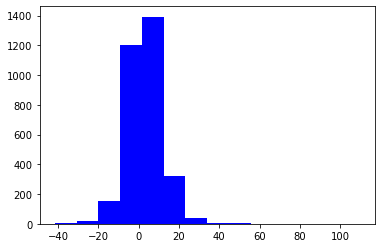

In [132]:
#Look at the distribution of values for employment growth rate
num_bins = 14
n,bins,patches = plt.hist(combined_ratings_df['Employment Growth Rate'],num_bins, facecolor = 'blue')
plt.show()
#Looks fairly normal/bell shaped
#Before changing Kalawao growth rate to zero, chart was very skewed

In [145]:
pd.set_option('display.max_rows', None)
combined_ratings_df.loc[combined_ratings_df["FIPS"]==1000]

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020,Employment Growth Rate


In [94]:
state_only_rows = combined_ratings_df.loc[combined_ratings_df['County']=='']
state_only_rows

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020,Employment Growth Rate


In [87]:
#Check for other null values in combined ratings dataframe
pd.set_option('display.max_rows', None)
combined_ratings_df.isnull().sum()


FIPS                                                     0
State                                                    0
County                                                   0
Deaths                                                 293
Years of Potential Life Lost Rate                      293
% Fair or Poor Health                                    0
Average Number of Physically Unhealthy Days              0
Average Number of Mentally Unhealthy Days                0
% Low Birthweight                                      107
% Smokers                                                0
% Adults with Obesity                                    0
Food Environment Index                                  19
% Physically Inactive                                    0
% With Access to Exercise Opportunities                  6
% Excessive Drinking                                     0
% Driving Deaths with Alcohol Involvement               35
Chlamydia Rate                                         1

In [88]:

combined_ratings_df.dtypes

FIPS                                                    int64
State                                                  object
County                                                 object
Deaths                                                float64
Years of Potential Life Lost Rate                     float64
% Fair or Poor Health                                   int64
Average Number of Physically Unhealthy Days           float64
Average Number of Mentally Unhealthy Days             float64
% Low Birthweight                                     float64
% Smokers                                               int64
% Adults with Obesity                                   int64
Food Environment Index                                float64
% Physically Inactive                                   int64
% With Access to Exercise Opportunities               float64
% Excessive Drinking                                    int64
% Driving Deaths with Alcohol Involvement             float64
Chlamydi

In [89]:
#Look at object type fields, decide if they should be converted to a number format for regression or omitted from dataset
combined_ratings_df.select_dtypes(include=['object']).columns

Index(['State', 'County', 'Primary Care Physicians Ratio', 'Dentist Ratio',
       'Mental Health Provider Ratio', 'Presence of Water Violation',
       'Other Primary Care Provider Ratio'],
      dtype='object')

In [ ]:
#State and county are categoric variables that do not work for linear regression and so should be omitted. PCP, Other PCP, 
#Dentist, and Mental Health Ratios seem to be a string of 3 numbers separated by colons, and first number indicates how many 
#people per provider, so for these three, we can keep the first number and eliminate the rest for the regression. Presence
#of water violation is a boolean, so we can convert those values to 0 and 1 for the regression

In [90]:
#Set output back to a small number of lines so showing a dataframe doesn't crash jupyter
pd.set_option('display.max_rows', 20)

## Linear Regression